In [90]:
def binary_search_closest(arr, target):
    """
    Perform binary search on a sorted array to find the closest index to the target.
    
    :param arr: List of sorted elements (can include negative numbers).
    :param target: The element to search for.
    :return: Index of the closest element to the target.
    """
    left, right = 0, len(arr) - 1

    # Handle edge cases where the target is outside the range of the array
    if target < arr[left]:
        return left
    if target > arr[right]:
        return right

    closest_index = left  # Initialize to the first index

    while left <= right:
        mid = (left + right) // 2
        print(f"left: {left}, right: {right}, mid: {mid}, arr[mid]: {arr[mid]}")

        # If exact match is found, return the index
        if arr[mid] == target:
            return mid

        # Update the closest index if the current mid is closer to the target
        if abs(arr[mid] - target) < abs(arr[closest_index] - target):
            closest_index = mid

        # If target is greater, search in the right half
        if arr[mid] < target:
            left = mid + 1
        # If target is smaller, search in the left half
        else:
            right = mid - 1

    # When the loop ends, closest_index will be the closest element
    return closest_index

arr = [1, 3, 5, 7, 9, 11]
target = 8
closest_index = binary_search_closest(arr, target)
print(f'Closest index to {target} is {closest_index}, value: {arr[closest_index]}')


def linear_interpolation(x0, y0, x1, y1, x):
    """
    Perform linear interpolation to find the y value for a given x.
    
    :param x0: First x-coordinate.
    :param y0: Corresponding y-coordinate to x0.
    :param x1: Second x-coordinate.
    :param y1: Corresponding y-coordinate to x1.
    :param x: The x value for which we want to interpolate a y value.
    :return: Interpolated y value.
    """
    if x1 == x0:
        raise ValueError("x0 and x1 cannot be the same value")
    
    # Linear interpolation formula
    y = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    return y


left: 0, right: 5, mid: 2, arr[mid]: 5
left: 3, right: 5, mid: 4, arr[mid]: 9
left: 3, right: 3, mid: 3, arr[mid]: 7
Closest index to 8 is 4, value: 9


[-5.50000e+01  9.63849e+05] [150.  186.1]
[[-5.50000e+01  9.63849e+05]
 [ 4.80500e+01  3.88086e+03]
 [ 1.50000e+02  1.86100e+02]]
A: 0.0011219261517215182
B: 0.00023520046646272318
C: 8.460569525266567e-08


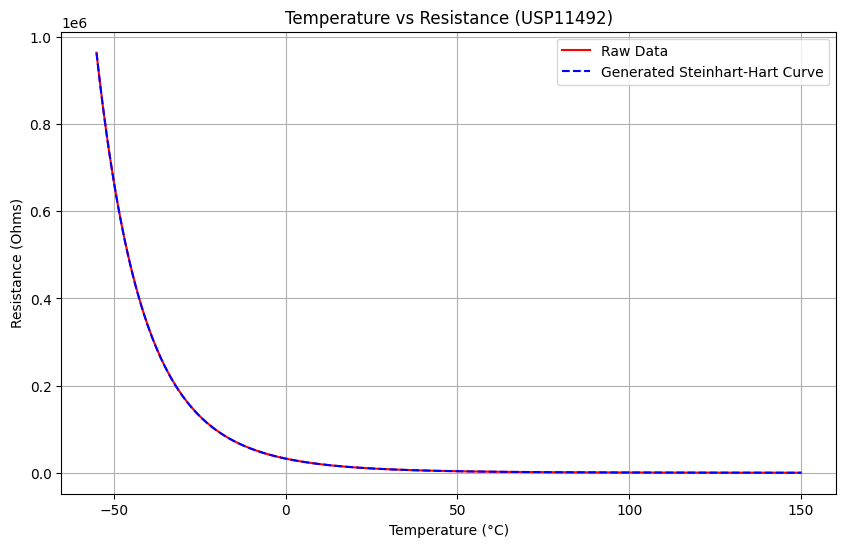

In [95]:
# Create a Jupyter Notebook code version of the MATLAB script for Thermistor calculations

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import re


# Constants
K = 273.15  # Convert Celsius to Kelvin

# Temp vs Resistance Data (Temperature in Celsius, Resistance in Ohms)
USP11492_FILE = "reference/USP11492.csv"
datarange = range(15, 4137)

data = []
with open(USP11492_FILE, "r", encoding='utf-8') as f:
    for idx, line in enumerate(f.readlines()):
        
        if idx in datarange:
            row = line.split(",")
            t = float(re.sub(r"[\,\"]", "", row[0]))
            r = float(re.sub(r"[\,\"]", "", row[1]))
            data.append([t, r])
    
data = np.array(data)
print(data[0], data[-1])
# Splitting the data into temperature and resistance
temperature = data[:, 0]
resistance = data[:, 1]

# Steinhart-Hart Equation section conversion

# Select resistance values for the calculation
R = np.array([
    [temperature[0], resistance[0]],  # First data point
    [temperature[len(temperature) // 2], resistance[len(temperature) // 2]],  # Middle data point
    [temperature[-1], resistance[-1]]  # Last data point
])
print(R)

# Calculate Y values (1 / (T + K)) where T is temperature in Celsius and K is the conversion constant to Kelvin
Y1 = 1 / (R[0, 0] + K)
Y2 = 1 / (R[1, 0] + K)
Y3 = 1 / (R[2, 0] + K)

# Logarithmic resistance values
L1 = np.log(R[0, 1])
L2 = np.log(R[1, 1])
L3 = np.log(R[2, 1])

# Calculate gamma values for the constants
gamma2 = (Y2 - Y1) / (L2 - L1)
gamma3 = (Y3 - Y1) / (L3 - L1)

# Calculate Steinhart-Hart coefficients
C = (gamma3 - gamma2) / (L3 - L2) / (L1 + L2 + L3)
B = gamma2 - C * (L1**2 + L1 * L2 + L2**2)
A = Y1 - (B + L1**2 * C) * L1

print(f"A: {A}\nB: {B}\nC: {C}")

# Expression Data
nx = 2000
start = -55 + K  # Start Temperature in Kelvin
finish = 150 + K  # End Temperature in Kelvin
dx = (finish - start) / nx

# Create arrays to store results
T = np.zeros(nx + 1)
Rcurve = np.zeros(nx + 1)
Tc = np.zeros(nx + 1)

# Calculate temperature and resistance curve using Steinhart-Hart equation
for i in range(nx + 1):
    T[i] = (i * dx) + start
    y = (A - 1 / T[i]) / C
    x = np.sqrt((B / (3 * C))**3 + (y**2) / 4)
    Rcurve[i] = np.exp((x - y / 2)**(1 / 3) - (x + y / 2)**(1 / 3))
    Tc[i] = T[i] - K  # Convert back to Celsius

# Plot the calculated curve
plt.figure(figsize=(10,6))

plt.plot(temperature, resistance, label="Raw Data", color='red')
plt.plot(Tc, Rcurve, label="Generated Steinhart-Hart Curve", color='blue', linestyle='--')

plt.title("Temperature vs Resistance (USP11492)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ohms)")
plt.grid(True)
plt.legend()
plt.show()


[   0. 5875.] [100. 190.]
[[   0.  5875. ]
 [  22.4 2283. ]
 [ 100.   190. ]]
A: 0.0012695897225755855
B: 0.0002648767281824261
C: 1.4179393133443658e-07


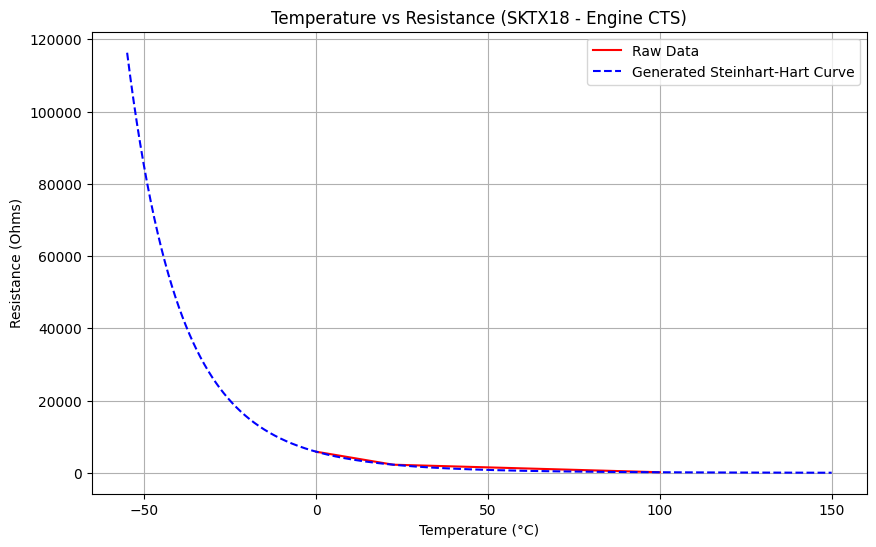

In [96]:
# Create a Jupyter Notebook code version of the MATLAB script for Thermistor calculations

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import re


# Constants
K = 273.15  # Convert Celsius to Kelvin

data = [
    [0, 5875.0],
    [22.4, 2283],
    [100, 190.0]
]

data = np.array(data)
print(data[0], data[-1])
# Splitting the data into temperature and resistance
temperature = data[:, 0]
resistance = data[:, 1]


# Select resistance values for the calculation
R = np.array([
    [temperature[0], resistance[0]],  # First data point
    [temperature[len(temperature) // 2], resistance[len(temperature) // 2]],  # Middle data point
    [temperature[-1], resistance[-1]]  # Last data point
])
print(R)

# Calculate Y values (1 / (T + K)) where T is temperature in Celsius and K is the conversion constant to Kelvin
Y1 = 1 / (R[0, 0] + K)
Y2 = 1 / (R[1, 0] + K)
Y3 = 1 / (R[2, 0] + K)

# Logarithmic resistance values
L1 = np.log(R[0, 1])
L2 = np.log(R[1, 1])
L3 = np.log(R[2, 1])

# Calculate gamma values for the constants
gamma2 = (Y2 - Y1) / (L2 - L1)
gamma3 = (Y3 - Y1) / (L3 - L1)

# Calculate Steinhart-Hart coefficients
C = (gamma3 - gamma2) / (L3 - L2) / (L1 + L2 + L3)
B = gamma2 - C * (L1**2 + L1 * L2 + L2**2)
A = Y1 - (B + L1**2 * C) * L1

print(f"A: {A}\nB: {B}\nC: {C}")

# Expression Data
nx = 2000
start = -55 + K  # Start Temperature in Kelvin
finish = 150 + K  # End Temperature in Kelvin
dx = (finish - start) / nx

# Create arrays to store results
T = np.zeros(nx + 1)
Rcurve = np.zeros(nx + 1)
Tc = np.zeros(nx + 1)

# Calculate temperature and resistance curve using Steinhart-Hart equation
for i in range(nx + 1):
    T[i] = (i * dx) + start
    y = (A - 1 / T[i]) / C
    x = np.sqrt((B / (3 * C))**3 + (y**2) / 4)
    Rcurve[i] = np.exp((x - y / 2)**(1 / 3) - (x + y / 2)**(1 / 3))
    Tc[i] = T[i] - K  # Convert back to Celsius

# Plot the calculated curve
plt.figure(figsize=(10,6))

plt.plot(temperature, resistance, label="Raw Data", color='red')
plt.plot(Tc, Rcurve, label="Generated Steinhart-Hart Curve", color='blue', linestyle='--')

plt.title("Temperature vs Resistance (SKTX18 - Engine CTS)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ohms)")
plt.grid(True)
plt.legend()
plt.show()


In [93]:
# Test cases
target_t1 = -10
Tc.sort()
print(Tc[0:10])
print(Rcurve[0:10])
test_r1_idx = binary_search_closest(Tc, target_t1)
print(f"Target: {target_t1} - {Rcurve[test_r1_idx]} Ohms\t {Tc[test_r1_idx]} degC")

target_t2 = 20
test_r2_idx = binary_search_closest(Tc, target_t2)
print(f"Index: {test_r2_idx}")
print(f"Target: {target_t2} - {Rcurve[test_r2_idx]} Ohms\t {Tc[test_r2_idx]} degC")

target_t3 = 80
test_r3_idx = binary_search_closest(Tc, target_t3)
print(f"Index: {test_r3_idx}")
print(f"Target: {target_t3} - {Rcurve[test_r3_idx]} Ohms\t {Tc[test_r3_idx]} degC")


[-55.     -54.8975 -54.795  -54.6925 -54.59   -54.4875 -54.385  -54.2825
 -54.18   -54.0775]
[963849.         956553.94424921 949319.52332645 942145.19063875
 935030.40488794 927974.63001601 920977.33515099 914037.99455335
 907156.08756316 900331.09854756]
left: 0, right: 2000, mid: 1000, arr[mid]: 47.5
left: 0, right: 999, mid: 499, arr[mid]: -3.8525000000000205
left: 0, right: 498, mid: 249, arr[mid]: -29.477499999999992
left: 250, right: 498, mid: 374, arr[mid]: -16.66500000000002
left: 375, right: 498, mid: 436, arr[mid]: -10.310000000000002
left: 437, right: 498, mid: 467, arr[mid]: -7.132499999999993
left: 437, right: 466, mid: 451, arr[mid]: -8.77249999999998
left: 437, right: 450, mid: 443, arr[mid]: -9.592499999999973
left: 437, right: 442, mid: 439, arr[mid]: -10.002499999999998
left: 440, right: 442, mid: 441, arr[mid]: -9.797500000000014
left: 440, right: 440, mid: 440, arr[mid]: -9.899999999999977
Target: -10 - 55200.84566601965 Ohms	 -10.002499999999998 degC
left: 0, righ